In [142]:
import pandas as pd
from statistics import stdev
import matplotlib.pyplot as plt
import numpy as np

In [143]:
df = pd.read_csv("IPO_2018to2022.csv")
df.head()

,TICKER,MARKET,YEAR,LISTPRICE,VOLUMEIPODAY,OPENPRICEIPODAY,HIGHESTPRICEIPODAY,CLOSINGPRICEIPODAY,NEWSHARES,TOTALAPPLICATIONS,...,XBUMIAPPLICATIONS,XBUMIAPPLICATIONSHARES,XBUMIBALLOTINGOSCBED,ELIGPERSONSSHARES,PVPLACEMENTSHARES,OFFERFORSALE,CAPITALRAISED,PUBLICISSUENEWSHARES,ENLARGEDSHARECAPITAL,MARKETCAPONLISTING
0,CORAZA,ACE,2022,0.28,NaN,NaN,NaN,NaN,2140000.0,26781.0,...,14299.0,1.850000e+09,171.40,21400000.0,96400000.0,21400000.0,33000000.0,117800000.0,428300000.0,119900000.0
1,SENHENG,MAIN,2022,1.07,NaN,NaN,NaN,NaN,30000000.0,16548.0,...,9679.0,2.499200e+08,15.66,22500000.0,149500000.0,139500000.0,NaN,250000000.0,NaN,NaN
2,TUJUSETIA,MAIN,2021,0.70,1145707.0,0.775,0.875,0.74,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YENHER,MAIN,2021,0.95,618271.0,0.995,1.000,0.90,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CTOS,MAIN,2021,1.10,3663593.0,1.500,1.760,1.62,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
# Create following columns:
# % difference between list price vs opening price on IPO day
# % difference between list price vs highest price on IPO day
# % difference between opening price on IPO day vs closing price on IPO day
# % difference between opening price on IPO day vs highest price on IPO day

df['LISTVSOPENING_PCT'] = df['OPENPRICEIPODAY']/df['LISTPRICE']*100 - 100
df['LISTVSHIGHEST_PCT'] = df['HIGHESTPRICEIPODAY']/df['LISTPRICE']*100 - 100

df['OPENINGVSCLOSING_PCT'] = df['CLOSINGPRICEIPODAY']/df['OPENPRICEIPODAY']*100 - 100
df['OPENINGVSHIGHEST_PCT'] = df['HIGHESTPRICEIPODAY']/df['OPENPRICEIPODAY']*100 - 100

In [145]:
df.shape

(56, 29)

In [147]:
# grab all years
years = df['YEAR'].unique().tolist()[::-1]
years

[2018, 2019, 2020, 2021, 2022]

## Measuring Subscription Interest: Oversubscription Rate by Year

### Aggregate, all combined (regardless listing price)

In [161]:
barheight = []
barerr = []

for year in years:
    df_series = df[((df['YEAR']==year))]['TOTALBALLOTINGOSCBED']
    count = df_series.count()

    median_year = round(df_series.median(),2)
    mean_year = round(df_series.mean(),2)
    print(str(year) + '(' + str(count) + '): median ' + str(median_year) + ', mean ' + str(mean_year))
        
    barheight.append(mean_year)
    barerr.append(stdev(df_series))

2018(11): median 16.35, mean 16.61
2019(15): median 9.41, mean 12.06
2020(11): median 15.9, mean 28.52
2021(17): median 42.07, mean 65.81


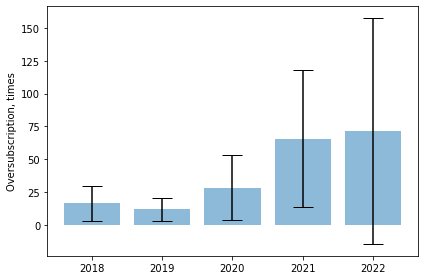

In [149]:
fig, ax = plt.subplots()
xpos = np.arange(len(barheight))
ax.bar(xpos, barheight, yerr=barerr, align='center',
       alpha=0.5, ecolor='black', capsize=10)
ax.set_xticks(xpos)
ax.set_xticklabels(years)
ax.set_ylabel('Oversubscription, times')

plt.tight_layout()
plt.show()

### For listing price at least RM1.00

In [150]:
print("IPO Oversubscription by year, for listing price >= RM1.00 :")
for year in years:
    df_series = df[((df['YEAR']==year)  & (df['LISTPRICE']>=1))]['TOTALBALLOTINGOSCBED']
    count = df_series.count()

    median_year = round(df_series.median(),2)
    mean_year = round(df_series.mean(),2)
    print(str(year) + '(' + str(count) + '): median ' + str(median_year) + ', mean ' + str(mean_year))    

IPO Oversubscription by year, for listing price >= RM1.00 :
2018(1): median 1.16, mean 1.16
2019(2): median 4.01, mean 4.01
2020(1): median 3.91, mean 3.91
2021(3): median 20.27, mean 22.23
2022(1): median 10.44, mean 10.44


### For listing price below RM1.00

In [151]:
barheight = []
barerr = []
for year in years:
    df_series = df[((df['YEAR']==year)  & (df['LISTPRICE']<1))]['TOTALBALLOTINGOSCBED']
    count = df_series.count()

    median_year = round(df_series.median(),2)
    mean_year = round(df_series.mean(),2)
    print(str(year) + '(' + str(count) + '): median ' + str(median_year) + ', mean ' + str(mean_year))   
    
    barheight.append(mean_year)
    if count >1:
        barerr.append(stdev(df_series))
    else:
        barerr.append(0)  

2018(10): median 17.68, mean 18.15
2019(13): median 11.34, mean 13.3
2020(10): median 20.09, mean 30.98
2021(14): median 66.56, mean 75.15
2022(1): median 132.5, mean 132.5


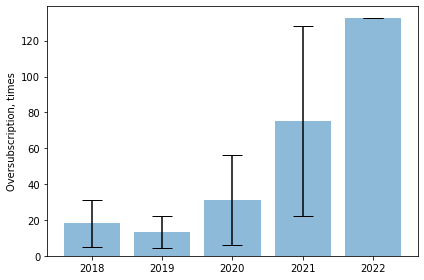

In [152]:
fig, ax = plt.subplots()
xpos = np.arange(len(barheight))
ax.bar(xpos, barheight, yerr=barerr, align='center',
       alpha=0.5, ecolor='black', capsize=10)
ax.set_xticks(xpos)
ax.set_xticklabels(years)
ax.set_ylabel('Oversubscription, times')

plt.tight_layout()
plt.show()

## Measuring Speculative Activity on IPO Day: Volume on IPO day by Year

### Aggregate, all combined (regardless listing price)

In [162]:
print("Volume on IPO day by year:")
# remove 2022 for now
del years[-1]

barheight = []
barerr = []

for year in years:
    df_series = df[((df['YEAR']==year))]['VOLUMEIPODAY']
    count = df_series.count()

    median_year = round(df_series.median(),2)
    mean_year = round(df_series.mean(),2)
    print(str(year) + '(' + str(count) + '): median ' + str(median_year) + ', mean ' + str(mean_year))    
    
    barheight.append(mean_year)
    if count >1:
        barerr.append(stdev(df_series))
    else:
        barerr.append(0)

Volume on IPO day by year:
2018(11): median 828043.0, mean 985776.91
2019(15): median 1185984.0, mean 1602265.53
2020(11): median 2070206.0, mean 2233225.36


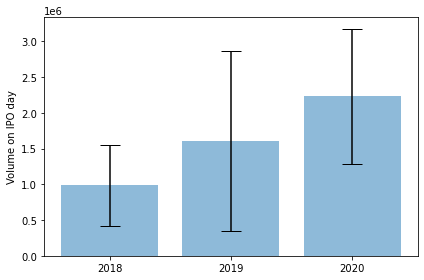

In [163]:
fig, ax = plt.subplots()
xpos = np.arange(len(barheight))
ax.bar(xpos, barheight, yerr=barerr, align='center',
       alpha=0.5, ecolor='black', capsize=10)
ax.set_xticks(xpos)
ax.set_xticklabels(years)
ax.set_ylabel('Volume on IPO day')

plt.tight_layout()
plt.show()

### For listing price at least RM1.00:

In [164]:
print("Volume on IPO day by year, for listing price >=RM1.00:")
for year in years:
    df_series = df[((df['YEAR']==year) & (df['LISTPRICE']>=1))]['VOLUMEIPODAY']
    count = df_series.count()

    median_year = round(df_series.median())
    mean_year = round(df_series.mean())
    print(str(year) + '(' + str(count) + '): median ' + str(median_year) + ', mean ' + str(mean_year))    

Volume on IPO day by year, for listing price >=RM1.00:
2018(1): median 736832, mean 736832
2019(2): median 1325753, mean 1325753
2020(1): median 4101546, mean 4101546


### For listing price less than RM1.00:

In [156]:
print("Volume on IPO day by year, for listing price <RM1.00:")

barheight = []
barerr = []

for year in years:
    df_series = df[((df['YEAR']==year) & (df['LISTPRICE']<1))]['VOLUMEIPODAY']
    count = df_series.count()

    median_year = round(df_series.median())
    mean_year = round(df_series.mean())
    print(str(year) + '(' + str(count) + '): median ' + str(median_year) + ', mean ' + str(mean_year))
    
    barheight.append(mean_year)
    if count >1:
        barerr.append(stdev(df_series))
    else:
        barerr.append(0)

Volume on IPO day by year, for listing price <RM1.00:
2018(10): median 853624, mean 1010671
2019(13): median 1185984, mean 1644806
2020(10): median 1981470, mean 2046393
2021(14): median 1300062, mean 1583495


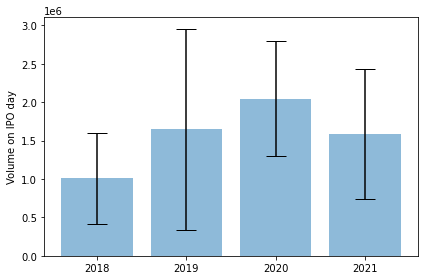

In [157]:
fig, ax = plt.subplots()
xpos = np.arange(len(barheight))
ax.bar(xpos, barheight, yerr=barerr, align='center',
       alpha=0.5, ecolor='black', capsize=10)
ax.set_xticks(xpos)
ax.set_xticklabels(years)
ax.set_ylabel('Volume on IPO day')

plt.tight_layout()
plt.show()

## Measuring Speculative Activity on IPO Day: % Difference between Listing vs Opening Price

In [158]:
barheight = []
barerr = []

for year in years:
    df_series = df[((df['YEAR']==year))]['LISTVSOPENING_PCT']
    count = df_series.count()

    median_year = round(df_series.median(),2)
    mean_year = round(df_series.mean(),2)
    print(str(year) + '(' + str(count) + '): median ' + str(median_year) + ', mean ' + str(mean_year))
    
    barheight.append(mean_year)
    if count >1:
        barerr.append(stdev(df_series))
    else:
        barerr.append(0)

2018(11): median 21.97, mean 30.31
2019(15): median 13.04, mean 22.67
2020(11): median 23.21, mean 50.81
2021(17): median 25.0, mean 59.9


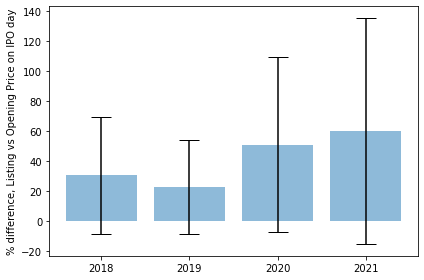

In [160]:
fig, ax = plt.subplots()
xpos = np.arange(len(barheight))
ax.bar(xpos, barheight, yerr=barerr, align='center',
       alpha=0.5, ecolor='black', capsize=10)
ax.set_xticks(xpos)
ax.set_xticklabels(years)
ax.set_ylabel('% difference, Listing vs Opening Price on IPO day')

plt.tight_layout()
plt.show()

In [6]:
X = df.copy()
del X['YEAR']

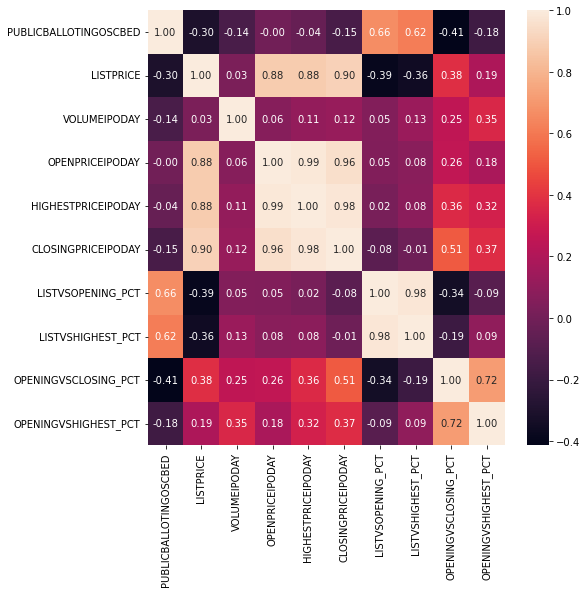

In [7]:
import matplotlib.pyplot as plt
from seaborn import heatmap
fig, ax = plt.subplots(figsize=(8,8))
ax = heatmap(X.corr(), fmt = '.2f',
            annot = True)

0.939663077427465
9.327819137861283


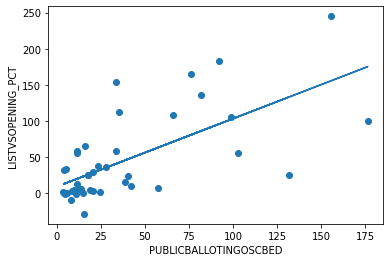

In [15]:
import numpy as np
# plot oversubscription rate vs % difference listing vs opening price
x_label = 'PUBLICBALLOTINGOSCBED'
y_label = 'LISTVSOPENING_PCT'
x = df[x_label]
y = df[y_label]
fig, ax = plt.subplots()
ax.scatter(x,y)


# ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)

m, b = np.polyfit(x, y, 1)

plt.plot(x, m * x + b)

print(m)
print(b)

In [ ]:
# ax.set_title('R2: ' + str(r2_score(y_test, y_predicted)))
from sk
r2_sc